# The Relationship between the Welfare of US States and Counties on the Severity of COVID-19

note for myself:

- some comments about inaccuracy of dataset, bring it up during collab hour about whether some datapoints should be
ommitted 
- maybe get rid of counties with no voting data?

- y variable = covid cases
- x variable = political affiliation, race, employment type, income/poverty, employed/unemployed

## Data cleaning and Loading

In [243]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.display import display

In [3]:
county_stats = pd.read_csv(r'/Users/adieaimannazrinnoornazri/ECO225/Project Data/county_statistics.csv')

Comparing the non-null and null values, we see that there is a maximum of 1756 null value rows present in the dataset.

In [4]:
county_stats.isnull().sum()

Unnamed: 0                         0
county                             0
state                              0
percentage16_Donald_Trump       1756
percentage16_Hillary_Clinton    1756
total_votes16                   1756
votes16_Donald_Trump            1756
votes16_Hillary_Clinton         1756
percentage20_Donald_Trump        377
percentage20_Joe_Biden           377
total_votes20                    234
votes20_Donald_Trump             234
votes20_Joe_Biden                234
lat                             1615
long                            1615
cases                           1615
deaths                          1615
TotalPop                        1725
Men                             1725
Women                           1725
Hispanic                        1725
White                           1725
Black                           1725
Native                          1725
Asian                           1725
Pacific                         1725
VotingAgeCitizen                1725
I

As some counties have no voting statistics meaning we are unable to know which political party won, we will be entirely dropping these rows.

In [5]:
county_stats.dropna(inplace=True, axis=0)
county_stats

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,3106,Yuma,AZ,0.505,0.450,40759.0,20586.0,18336.0,0.523,0.461,...,2.4,1.8,3.0,19.6,74891.0,74.4,20.8,4.6,0.2,10.9
3107,3107,Yuma,CO,0.805,0.150,4664.0,3755.0,701.0,0.826,0.156,...,6.5,0.3,10.5,15.7,4940.0,71.6,15.5,12.4,0.5,2.4
3108,3108,Zapata,TX,0.328,0.656,3134.0,1028.0,2056.0,0.525,0.471,...,4.4,0.6,2.0,18.2,5146.0,66.0,21.0,12.6,0.4,12.4
3109,3109,Zavala,TX,0.204,0.777,3390.0,692.0,2633.0,0.340,0.654,...,2.1,4.2,5.4,13.7,4397.0,73.9,21.2,4.9,0.1,10.1


In [6]:
county_stats.isnull().sum()

Unnamed: 0                      0
county                          0
state                           0
percentage16_Donald_Trump       0
percentage16_Hillary_Clinton    0
total_votes16                   0
votes16_Donald_Trump            0
votes16_Hillary_Clinton         0
percentage20_Donald_Trump       0
percentage20_Joe_Biden          0
total_votes20                   0
votes20_Donald_Trump            0
votes20_Joe_Biden               0
lat                             0
long                            0
cases                           0
deaths                          0
TotalPop                        0
Men                             0
Women                           0
Hispanic                        0
White                           0
Black                           0
Native                          0
Asian                           0
Pacific                         0
VotingAgeCitizen                0
Income                          0
IncomeErr                       0
IncomePerCap  

Now all counties with missing datapoints have been removed. This was necessary as we want to find exactly how many counties voted Democratic or Republican, one of the key independent variables we will consider.

For ease of dealing with the datapoints, the table will order datapoints for each state proceeding one another rather than separated.

In [7]:
county_stats = county_stats.sort_values(['state','county'], ascending = [True, True])

For some columns we will convert the datapoints into percentages to see the change over time. This is necessary as we would like to see how any change over time in political leaning has an impact on COVID-19 cases.

In this following function, new columns were created for the relevant values needed. One of these being which party each county voted for in 2020 and 2016. Additionally a vote swing column will be added to see whether the vote switched parties.

In [273]:
def percentages(county_stats):
    county_stats["% \u0394 in Total Votes"] = ((county_stats['total_votes20'] - county_stats['total_votes16'])/county_stats['total_votes16'])*100
    county_stats["% \u0394 in Rep. Votes"] = county_stats["percentage20_Donald_Trump"] - county_stats["percentage16_Donald_Trump"]
    county_stats["% \u0394 in Dem. Votes"] = county_stats['percentage20_Joe_Biden'] - county_stats['percentage16_Hillary_Clinton']
    county_stats["percentage20_Donald_Trump"] = county_stats["percentage20_Donald_Trump"] * 100
    county_stats["percentage16_Donald_Trump"] = county_stats["percentage16_Donald_Trump"] * 100
    county_stats['percentage16_Hillary_Clinton'] = county_stats['percentage16_Hillary_Clinton'] * 100
    county_stats['percentage20_Joe_Biden'] = county_stats['percentage20_Joe_Biden'] * 100
    county_stats['COVID Cases per Capita'] = county_stats['cases'] / county_stats['TotalPop']
    county_stats['Employment Rate'] = 100 - county_stats['Unemployment'] 
    county_stats['Elected 2016'] = np.where(county_stats['percentage16_Donald_Trump'] > county_stats['percentage16_Hillary_Clinton'], 'Republican', 'Democrat')
    county_stats['Elected 2020'] = np.where(county_stats['percentage20_Donald_Trump'] > county_stats['percentage20_Joe_Biden'], 'Republican', 'Democrat')  
    county_stats['Vote Swing'] = np.where(county_stats['Elected 2016'] != county_stats['Elected 2020'], 'Yes', 'No')
    county_stats['COVID Death Rates'] = county_stats['deaths'] / county_stats['cases']
    county_stats['Majority Race'] = county_stats[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].idxmax(axis=1)
    county_stats['Minority Race'] = county_stats[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].idxmin(axis=1)
percentages(county_stats)

This following line creates a new dataframe selecting only the relevant columns from the original data frame. In addition some columns were renamed in order for better clarity and presentation.

In [255]:
county_new = county_stats[['county', 'state','lat','long', '% \u0394 in Total Votes','% \u0394 in Rep. Votes', '% \u0394 in Dem. Votes', 'percentage20_Joe_Biden', 'percentage16_Hillary_Clinton', "percentage20_Donald_Trump","percentage16_Donald_Trump",'Elected 2016', 'Elected 2020'
                          ,'cases', 'deaths', 'COVID Cases per Capita', 'COVID Death Rates', 'Vote Swing', 'Employment Rate', 'Unemployment',
                          'TotalPop','Men','Women', 'Income','IncomeErr','IncomePerCap','IncomePerCapErr','Poverty','Professional',
                           'Service','Office','Construction','Production', 'PrivateWork','PublicWork','SelfEmployed','FamilyWork', 
                           'Hispanic','White','Black','Native','Asian','Pacific','Majority Race','Minority Race']].copy()
county_new = county_new.rename(columns={'percentage20_Joe_Biden': '2020 Democrat Vote Share %'})
county_new = county_new.rename(columns={'percentage16_Hillary_Clinton': '2016 Democrat Vote Share %'})
county_new = county_new.rename(columns={'percentage20_Donald_Trump': '2020 Republican Vote Share %'})
county_new = county_new.rename(columns={'percentage16_Donald_Trump': '2016 Republican Vote Share %'})
county_new = county_new.rename(columns={"Unemployment": 'Unemployment Rate'})
county_new = county_new.rename(columns={"Office": '% in Office Work'})
county_new = county_new.rename(columns={"Service": '% in Service Work'})
county_new = county_new.rename(columns={"Production": '% in Production Work'})
county_new = county_new.rename(columns={"Construction": '% in Construction'})
county_new = county_new.rename(columns={"Professional": '% in Professional Work'})
county_new = county_new.rename(columns={"PrivateWork": '% in Private Work'})
county_new = county_new.rename(columns={"PublicWork": '% in Public Work'})
county_new = county_new.rename(columns={"SelfEmployed": '% in Self Employed'})
county_new = county_new.rename(columns={"FamilyWork": '% in Family Work'})
county_new = county_new.rename(columns={"IncomePerCap": 'Income Per Capita'})
county_new = county_new.rename(columns={"Poverty": 'Poverty Rate'})
county_new = county_new.rename(columns={"county": 'County'})
county_new = county_new.rename(columns={"cases": 'Cases'})
county_new = county_new.rename(columns={"deaths": 'Deaths'})
county_new = county_new.rename(columns={"state": 'State'})
county_new.reset_index(drop=True, inplace=True)
county_new

,County,State,lat,long,% Δ in Total Votes,% Δ in Rep. Votes,% Δ in Dem. Votes,2020 Democrat Vote Share %,2016 Democrat Vote Share %,2020 Republican Vote Share %,...,% in Self Employed,% in Family Work,Hispanic,White,Black,Native,Asian,Pacific,Majority Race,Minority Race
0,Autauga,AL,32.539527,-86.644082,12.075747,-0.019,0.030,27.0,24.0,71.5,...,5.6,0.1,2.7,75.4,18.9,0.3,0.9,0.0,White,Pacific
1,Baldwin,AL,30.727750,-87.722071,15.788075,-0.012,0.027,22.3,19.6,76.2,...,6.3,0.1,4.4,83.1,9.5,0.8,0.7,0.0,White,Pacific
2,Barbour,AL,31.868263,-85.387129,0.644851,0.013,-0.011,45.6,46.7,53.6,...,6.5,0.3,4.2,45.7,47.8,0.2,0.6,0.0,Black,Pacific
3,Bibb,AL,32.996421,-87.125115,9.430727,0.014,-0.007,20.7,21.4,78.4,...,6.3,0.3,2.4,74.6,22.0,0.4,0.0,0.0,White,Asian
4,Blount,AL,33.982109,-86.567906,8.174441,-0.003,0.011,9.6,8.5,89.6,...,4.0,0.1,9.0,87.4,1.5,0.3,0.1,0.0,White,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,Sweetwater,WY,41.659439,-108.882788,-0.348118,0.008,0.036,23.0,19.4,73.7,...,3.8,0.0,16.0,79.6,0.8,0.6,0.6,0.5,White,Pacific
3042,Teton,WY,43.935225,-110.589080,20.540407,-0.026,0.070,67.1,60.1,29.6,...,6.5,0.0,15.0,81.5,0.5,0.3,2.2,0.0,White,Pacific
3043,Uinta,WY,41.287818,-110.547578,16.751521,0.033,0.020,16.9,14.9,79.7,...,6.6,0.4,9.1,87.7,0.1,0.9,0.1,0.0,White,Pacific
3044,Washakie,WY,43.904516,-107.680187,7.994616,0.025,0.019,16.2,14.3,80.9,...,8.1,0.2,14.2,82.2,0.3,0.4,0.1,0.0,White,Pacific


Another dataframe will be created only with state results, this will meaning averaging out all the values of the counties corresponding to a certain state and displaying only that averaged value for each column.

We will use this to be able to plot graphs that use only state data.

In [276]:
states_only = county_new.copy()
states_only = states_only.groupby('State').mean().apply(list).reset_index()
states_only

,State,lat,long,% Δ in Total Votes,% Δ in Rep. Votes,% Δ in Dem. Votes,2020 Democrat Vote Share %,2016 Democrat Vote Share %,2020 Republican Vote Share %,2016 Republican Vote Share %,...,% in Private Work,% in Public Work,% in Self Employed,% in Family Work,Hispanic,White,Black,Native,Asian,Pacific
0,AL,32.884280,-86.710122,7.467182,0.003806,0.004254,34.214925,33.789552,64.791045,64.410448,...,78.171642,16.049254,5.573134,0.210448,3.298507,65.168657,28.673134,0.607463,0.711940,0.017910
1,AR,34.911889,-92.433978,4.447740,0.041227,-0.022893,28.112000,30.401333,68.946667,64.824000,...,75.233333,17.185333,7.376000,0.202667,5.090667,75.634667,16.132000,0.540000,0.692000,0.077333
2,AZ,33.675904,-111.463232,50.144617,0.020400,0.017267,43.646667,41.920000,54.846667,52.806667,...,72.000000,21.846667,5.953333,0.180000,30.886667,50.826667,1.813333,13.233333,1.293333,0.126667
3,CA,37.843962,-120.728594,59.720353,-0.004655,0.041862,54.474138,50.287931,43.256897,43.722414,...,71.148276,18.881034,9.567241,0.405172,30.070690,54.762069,2.944828,1.650000,7.070690,0.291379
4,CO,38.935474,-105.486240,17.351495,-0.000016,0.051500,41.750000,36.600000,55.957813,55.959375,...,71.354687,18.268750,9.984375,0.403125,20.037500,74.657813,1.482813,0.831250,1.109375,0.114062
5,CT,41.635706,-72.673927,-90.099449,-0.146429,0.179286,68.685714,50.757143,29.728571,44.371429,...,79.171429,14.442857,6.200000,0.157143,12.214286,74.842857,6.700000,0.128571,3.671429,0.000000
6,DC,38.904178,-77.016560,-86.526660,-0.001000,0.012000,94.000000,92.800000,4.000000,4.100000,...,71.000000,24.600000,4.300000,0.100000,10.700000,36.000000,46.900000,0.200000,3.700000,0.000000
7,DE,39.109277,-75.533237,16.484102,-0.029333,0.061333,54.266667,48.133333,44.300000,47.233333,...,79.566667,15.966667,4.333333,0.133333,8.533333,65.366667,20.100000,0.400000,2.866667,0.000000
8,FL,28.940755,-82.700744,16.072987,0.012642,0.006209,35.698507,35.077612,63.288060,62.023881,...,76.195522,17.340299,6.298507,0.156716,13.725373,68.120896,14.201493,0.395522,1.543284,0.076119
9,GA,32.808532,-83.577430,19.361094,-0.001157,0.012415,35.045912,33.804403,63.971698,64.087421,...,75.218868,18.516352,6.116352,0.154088,6.233333,62.564151,28.144654,0.189937,1.201258,0.045912


# Summary Statistics Tables

Summary statistics will include the:

- political affiliation (% $\Delta$ in Total Votes, % $\Delta$ in Rep. Votes, % $\Delta$ in Dem. Votes, Vote Swing) 
- race (Majority and Minority)
- Employment Type (Professional, Service, Office, Construction, Production, Private Work, Public Work, Self Employed, Family Work)
- Wealth (Income, Income per capita, Poverty Rate)
- Employment Level (Employment rate, Unemploment rate)

This will be seperated into two types of summary statistics, numerical and categorical.

**Numerical Summary Statistics:**
- Covid Data
- Employment Type
- Wealth Level
- Employment Level

### Covid Data Summary Statistics (Counties)

In [40]:
covid_sum_stats = county_new[['Cases','Deaths','COVID Cases per Capita','COVID Death Rates']].describe()
covid_sum_stats.drop('count', inplace=True)
covid_sum_stats.round(decimals=2)

,cases,deaths,COVID Cases per Capita,COVID Death Rates
mean,2902.46,72.73,0.03,0.02
std,10817.51,342.06,0.02,0.02
min,0.00,0.00,0.00,0.00
25%,241.25,3.00,0.02,0.01
50%,654.50,11.00,0.03,0.02
75%,1794.75,36.00,0.04,0.03
max,309190.00,7404.00,0.20,0.20


### Covid Data Summary Statistics (States)

In [279]:
state_covid_sum_stats = states_only[['Cases','Deaths','COVID Cases per Capita','COVID Death Rates']].describe()
state_covid_sum_stats.drop('count', inplace=True)
state_covid_sum_stats.round(decimals=2)

,Cases,Deaths,COVID Cases per Capita,COVID Death Rates
mean,4020.61,130.00,0.03,0.02
std,4388.09,199.77,0.01,0.01
min,185.18,3.35,0.00,0.01
25%,1281.43,17.48,0.02,0.01
50%,2387.72,44.10,0.02,0.02
75%,4065.15,102.81,0.04,0.03
max,17369.00,778.76,0.05,0.09


### Employment Type Summary Statistics

In [10]:
employment_sum_stats = county_new[['% in Professional Work',
                           '% in Service Work','% in Office Work','% in Construction','% in Production Work', '% in Private Work','% in Public Work','% in Self Employed','% in Family Work'] ].describe()
employment_sum_stats.drop('count', inplace=True)
employment_sum_stats.round(decimals=2)

,% in Professional Work,% in Service Work,% in Office Work,% in Construction,% in Production Work,% in Private Work,% in Public Work,% in Self Employed,% in Family Work
mean,31.42,18.08,21.77,12.70,16.03,75.22,16.69,7.81,0.28
std,6.43,3.66,3.03,4.12,5.77,7.33,5.91,3.87,0.45
min,11.40,0.00,4.80,2.20,0.00,32.10,4.40,0.00,0.00
25%,27.20,15.70,19.82,9.90,11.80,71.80,12.60,5.30,0.10
50%,30.50,17.70,22.00,12.20,15.70,76.40,15.60,6.80,0.20
75%,34.80,20.00,23.80,14.90,19.70,80.30,19.30,9.20,0.30
max,69.00,46.40,37.20,36.40,48.70,88.80,62.30,38.00,8.00


### Wealth Level Summary Statistics

In [11]:
wealth_sum_stats = county_new[['Income', 'Income Per Capita','Poverty Rate']].describe()
wealth_sum_stats.drop('count', inplace=True)
wealth_sum_stats.round(decimals=2)

,Income,Income Per Capita,Poverty Rate
mean,49507.42,25914.91,15.99
std,12867.22,6115.95,6.50
min,19264.00,10960.00,2.40
25%,41115.00,21782.00,11.40
50%,47938.00,25211.00,15.20
75%,55433.25,28940.75,19.30
max,129588.00,69529.00,52.00


### Employment Level Summary Statistics

In [24]:
employment_level_sum_stats = county_new[['Employment Rate', 'Unemployment Rate']].describe()
employment_level_sum_stats.drop('count', inplace=True)
employment_level_sum_stats.round(decimals=2)

,Employment Rate,Unemployment Rate
mean,93.68,6.32
std,2.97,2.97
min,71.30,0.00
25%,92.20,4.40
50%,94.00,6.00
75%,95.60,7.80
max,100.00,28.70


Dealing with categorical statistics we will use dummy variables to be able to computate a summary statistics table.

**Cateogorical Summary Statistics:**
- Political Affiliation
- Race

The entirety of the tables are not all categorical with some numerical statistics included as well.

### Political Affiliation Summary Statistics

In [130]:
county_new_dum = pd.get_dummies(county_new, columns=['Vote Swing', 'Majority Race', 'Minority Race'])
county_new_dum.columns = county_new_dum.columns.str.replace('_', ' ')

political_sum_stats = county_new_dum[['% \u0394 in Total Votes', '% \u0394 in Rep. Votes','% \u0394 in Dem. Votes','Vote Swing No', 'Vote Swing Yes', '2020 Democrat Vote Share %', '2016 Democrat Vote Share %', '2020 Republican Vote Share %', '2016 Republican Vote Share %'] ].describe()
political_sum_stats.drop('count', inplace=True)
political_sum_stats.round(decimals=2)

,% Δ in Total Votes,% Δ in Rep. Votes,% Δ in Dem. Votes,Vote Swing No,Vote Swing Yes,2020 Democrat Vote Share %,2016 Democrat Vote Share %,2020 Republican Vote Share %,2016 Republican Vote Share %
mean,12.61,0.02,0.01,0.97,0.03,32.62,31.23,65.65,64.09
std,20.90,0.03,0.03,0.16,0.16,15.51,14.97,15.63,15.24
min,-99.34,-0.30,-0.27,0.00,0.00,3.10,3.10,4.00,4.10
25%,6.34,0.00,-0.00,1.00,0.00,20.80,20.30,56.80,55.70
50%,11.48,0.01,0.01,1.00,0.00,29.55,28.20,68.80,67.00
75%,17.45,0.03,0.03,1.00,0.00,41.58,39.30,77.60,75.20
max,396.78,0.28,0.34,1.00,1.00,94.00,92.80,96.20,95.30


### Race Summary Statistics

In [258]:
county_new_dum.columns = county_new_dum.columns.str.replace('_', '')

race_sum_stats = county_new_dum[['Hispanic','White','Black','Native','Asian','Pacific', 'Majority Race Asian','Majority Race Black','Majority Race Hispanic','Majority Race Native','Majority Race White','Minority Race Asian','Minority Race Black','Minority Race Hispanic','Minority Race Native','Minority Race Pacific']].describe()
race_sum_stats.drop('count', inplace=True)
race_sum_stats.round(decimals=2)

,Hispanic,White,Black,Native,Asian,Pacific,Majority Race Asian,Majority Race Black,Majority Race Hispanic,Majority Race Native,Majority Race White,Minority Race Asian,Minority Race Black,Minority Race Hispanic,Minority Race Native,Minority Race Pacific
mean,9.20,77.22,8.80,1.53,1.24,0.07,0.00,0.04,0.04,0.01,0.91,0.07,0.06,0.00,0.16,0.70
std,13.83,19.73,14.31,6.28,2.53,0.39,0.03,0.19,0.19,0.09,0.28,0.26,0.23,0.07,0.37,0.46
min,0.00,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,65.70,0.60,0.10,0.30,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,3.90,84.50,2.10,0.30,0.60,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
75%,9.40,93.00,9.80,0.60,1.20,0.10,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
max,99.20,100.00,86.90,82.20,41.80,11.40,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Plots, Histograms, Figures

Note to self: 
- NO LEGENDS

In [329]:
list(county_new.columns)

['County',
 'State',
 'lat',
 'long',
 '% Δ in Total Votes',
 '% Δ in Rep. Votes',
 '% Δ in Dem. Votes',
 '2020 Democrat Vote Share %',
 '2016 Democrat Vote Share %',
 '2020 Republican Vote Share %',
 '2016 Republican Vote Share %',
 'Elected 2016',
 'Elected 2020',
 'Cases',
 'Deaths',
 'COVID Cases per Capita',
 'COVID Death Rates',
 'Vote Swing',
 'Employment Rate',
 'Unemployment Rate',
 'TotalPop',
 'Men',
 'Women',
 'Income',
 'IncomeErr',
 'Income Per Capita',
 'IncomePerCapErr',
 'Poverty Rate',
 '% in Professional Work',
 '% in Service Work',
 '% in Office Work',
 '% in Construction',
 '% in Production Work',
 '% in Private Work',
 '% in Public Work',
 '% in Self Employed',
 '% in Family Work',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'Majority Race',
 'Minority Race']

**Political Affiliation**
- vote % and covid infection rates **(mapping of counties with bubble size showing rate)**  DONE
   - use color coding to show rep/dem

- swing yes/no to democrat and covid infection rates **(bar graph)**
- swing yes/no to republican and covid deaths **(bar graph)**

**Race**
- race and covid infection rates **(scatter plot?)**
- race and covid deaths **(scatter plot?)**

**Employment Level**
- employment rate and covid infection rates **(scatter plot)**
- employment rate and covid death rates **(scatter plot)**
- unemployment rate and covid infection rates **(scatter plot)**
- employment rate and covid death rates **(scatter plot)**

**Wealth**
- income (or per capita) and covid infection and death rates
- poverty rate and covid infection and death rates

**Employment Type**
- work type and covid infection and death rates **(bar graph)**

In [308]:
# add bubble sizing with '% Δ in Dem. Votes'
# make another scatter plot next to it but with '% Δ in Rep. Votes'

fig = px.scatter(states_only, x='Income Per Capita', y='COVID Death Rates', color='2020 Democrat Vote Share %'
                , color_continuous_scale=px.colors.sequential.Bluered_r)
fig.layout.update(title_text='Income Per Capita and COVID Death Rates for US States', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black")
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig.show()

In [328]:
fig = px.scatter(states_only, x='Income Per Capita', y='COVID Cases per Capita', color='State', text='State'
                , width = 1000, height = 800)
fig.layout.update(title_text='Income and COVID Cases per Capita for US States', title_x = 0.5,
                  showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", )
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True))
fig.show()

In [312]:
fig = px.scatter(county_new, x='Income Per Capita', y='COVID Cases per Capita', color='Elected 2020', 
                 color_discrete_sequence=['red','blue']
                 , height = 800)
fig.layout.update(title_text='Income and COVID Cases per Capita for US Counties <br> (Red = Republican; Blue = Democratic)', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig.show()

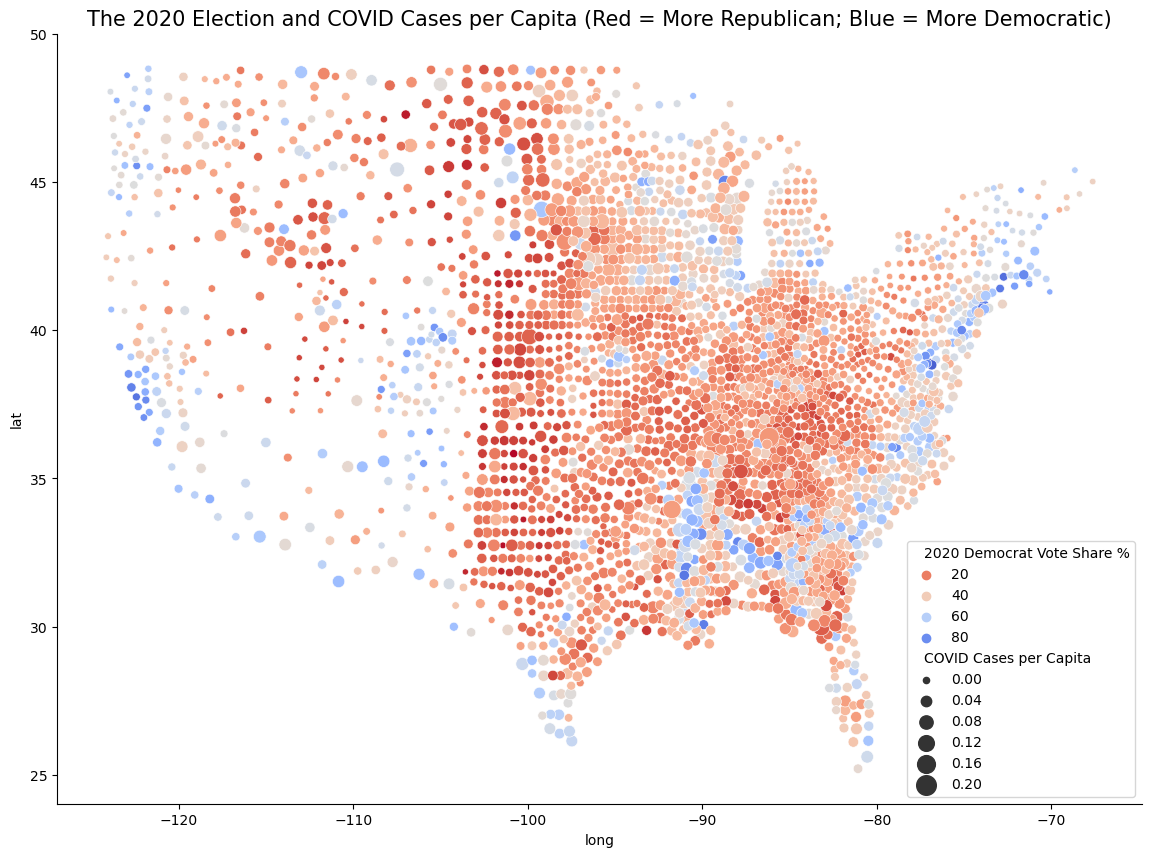

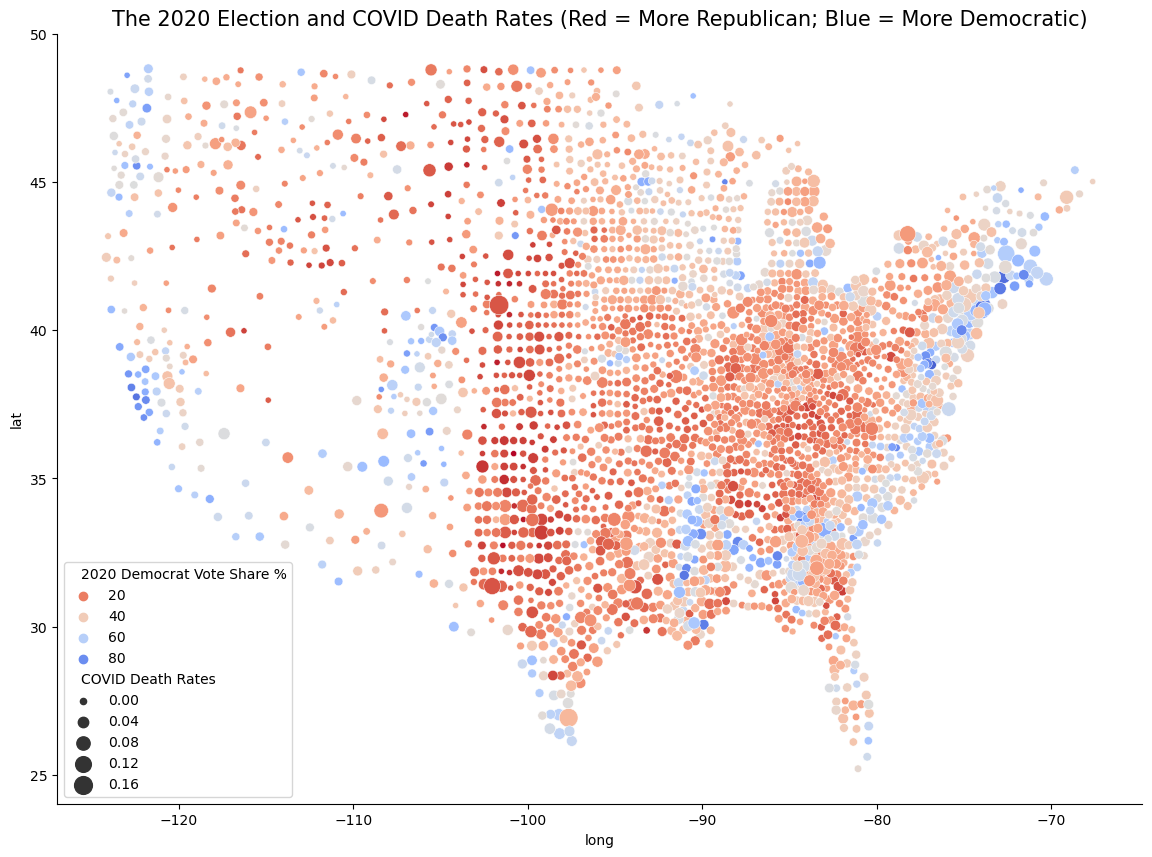

In [324]:
df_mainland = county_new[~county_new["State"].isin(["AK", "HI"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "long", y = "lat", hue = '2020 Democrat Vote Share %', size = 'COVID Cases per Capita', 
                sizes = (20, 200), size_norm = (0, 0.20), hue_norm = (3.10,94.0), palette = "coolwarm_r")
plt.title("The 2020 Election and COVID Cases per Capita (Red = More Republican; Blue = More Democratic)", fontsize=15);
sns.despine()


plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "long", y = "lat", hue = '2020 Democrat Vote Share %', size = 'COVID Death Rates', 
                sizes = (20, 200), size_norm = (0, 0.20), hue_norm = (3.10,94.0), palette = "coolwarm_r")
plt.title("The 2020 Election and COVID Death Rates (Red = More Republican; Blue = More Democratic)", fontsize=15);
sns.despine()

In [85]:
county_new['Elected 2016'].unique()

array(['Republican', 'Democrat'], dtype=object)

In [86]:
county_new['Elected 2020'].unique()

array(['Republican', 'Democrat'], dtype=object)

In [357]:
fig = px.bar(county_new, x="State", y="Cases", color="Elected 2020", title="Long-Form Input"
             , height=800, width = 1000, color_discrete_sequence=['red','blue'])
fig.layout.update(title_text='COVID Cases in US States <br> (Red = Republican; Blue = Democratic)', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero')
                 , bargap = 0)
fig.show()

## Conclusion